In [165]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [166]:

# File paths (update if your files are stored in another directory)
demographics_path = "telco_customer_demographics.csv"
billing_path = "telco_billing_payments.csv"
usage_path = "telco_usage_subscriptions.csv"
support_path = "telco_support_complaints.csv"
churn_path = "telco_churn_labels.csv"

In [167]:
# Load the dataset
df_demographics = pd.read_csv('telco_customer_demographics.csv')
df_demographics.head()

,Customer ID,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population
0,8779-QRDMV,Male,78,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701
1,7495-OOKFY,Female,74,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668
2,1658-BYGOY,Male,71,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534
3,4598-XLKNJ,Female,78,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778
4,4846-WHAFZ,Female,80,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265


In [168]:
df_billing = pd.read_csv('telco_billing_payments.csv')
df_billing.head()

,Customer ID,Monthly Charge,Total Charges,Total Revenue,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Payment Method,Paperless Billing
0,8779-QRDMV,39.65,39.65,59.65,0.00,20,0.00,Bank Withdrawal,Yes
1,7495-OOKFY,80.65,633.30,1024.10,0.00,0,390.80,Credit Card,Yes
2,1658-BYGOY,95.45,1752.55,1910.88,45.61,0,203.94,Bank Withdrawal,Yes
3,4598-XLKNJ,98.50,2514.50,2995.07,13.43,0,494.00,Bank Withdrawal,Yes
4,4846-WHAFZ,76.50,2868.15,3102.36,0.00,0,234.21,Bank Withdrawal,Yes


In [169]:
df_usage = pd.read_csv('telco_usage_subscriptions.csv')
df_usage.head()

,Customer ID,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Offer,Tenure in Months
0,8779-QRDMV,No,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,NaN,1
1,7495-OOKFY,Yes,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Offer E,8
2,1658-BYGOY,Yes,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Offer D,18
3,4598-XLKNJ,Yes,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Offer C,25
4,4846-WHAFZ,Yes,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Offer C,37


In [170]:
df_support = pd.read_csv('telco_support_complaints.csv')
df_support.head()

,Customer ID,Referred a Friend,Number of Referrals,Satisfaction Score,Customer Status,Churn Reason,Churn Category
0,8779-QRDMV,No,0,3,Churned,Competitor offered more data,Competitor
1,7495-OOKFY,Yes,1,3,Churned,Competitor made better offer,Competitor
2,1658-BYGOY,No,0,2,Churned,Competitor made better offer,Competitor
3,4598-XLKNJ,Yes,1,2,Churned,Limited range of services,Dissatisfaction
4,4846-WHAFZ,Yes,1,2,Churned,Extra data charges,Price


In [171]:
df_churn = pd.read_csv('telco_churn_labels.csv')
df_churn.head()

,Customer ID,Churn Label,Churn Score,CLTV
0,8779-QRDMV,Yes,91,5433
1,7495-OOKFY,Yes,69,5302
2,1658-BYGOY,Yes,81,3179
3,4598-XLKNJ,Yes,88,5337
4,4846-WHAFZ,Yes,67,2793


In [172]:
# Merge datasets step by step on 'Customer ID'
df_merged = df_demographics.merge(df_billing, on="Customer ID", how="left") \
                           .merge(df_usage, on="Customer ID", how="left") \
                           .merge(df_support, on="Customer ID", how="left") \
                           .merge(df_churn, on="Customer ID", how="left")

In [173]:
# Check the shape of the final dataset
print("Final merged dataset shape:", df_merged.shape)

Final merged dataset shape: (7043, 47)


In [174]:
# Display sample of merged dataset
df_merged.head()

,Customer ID,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Tenure in Months,Referred a Friend,Number of Referrals,Satisfaction Score,Customer Status,Churn Reason,Churn Category,Churn Label,Churn Score,CLTV
0,8779-QRDMV,Male,78,Yes,No,No,0,United States,California,Los Angeles,...,1,No,0,3,Churned,Competitor offered more data,Competitor,Yes,91,5433
1,7495-OOKFY,Female,74,Yes,Yes,Yes,1,United States,California,Los Angeles,...,8,Yes,1,3,Churned,Competitor made better offer,Competitor,Yes,69,5302
2,1658-BYGOY,Male,71,Yes,No,Yes,3,United States,California,Los Angeles,...,18,No,0,2,Churned,Competitor made better offer,Competitor,Yes,81,3179
3,4598-XLKNJ,Female,78,Yes,Yes,Yes,1,United States,California,Inglewood,...,25,Yes,1,2,Churned,Limited range of services,Dissatisfaction,Yes,88,5337
4,4846-WHAFZ,Female,80,Yes,Yes,Yes,1,United States,California,Whittier,...,37,Yes,1,2,Churned,Extra data charges,Price,Yes,67,2793


In [175]:
# 1. Check for duplicates
duplicates = df_merged.duplicated(subset=["Customer ID"]).sum()
print(f" Number of duplicate Customer IDs: {duplicates}")

 Number of duplicate Customer IDs: 0


In [176]:
print(df_merged.dtypes)

Customer ID                     object
Gender                          object
Age                              int64
Senior Citizen                  object
Married                         object
Dependents                      object
Number of Dependents             int64
Country                         object
State                           object
City                            object
Zip Code                         int64
Latitude                       float64
Longitude                      float64
Population                       int64
Monthly Charge                 float64
Total Charges                  float64
Total Revenue                  float64
Total Refunds                  float64
Total Extra Data Charges         int64
Total Long Distance Charges    float64
Payment Method                  object
Paperless Billing               object
Phone Service                   object
Multiple Lines                  object
Internet Service                object
Internet Type            

In [177]:
print(df_merged.isnull().sum())

Customer ID                       0
Gender                            0
Age                               0
Senior Citizen                    0
Married                           0
Dependents                        0
Number of Dependents              0
Country                           0
State                             0
City                              0
Zip Code                          0
Latitude                          0
Longitude                         0
Population                        0
Monthly Charge                    0
Total Charges                     0
Total Revenue                     0
Total Refunds                     0
Total Extra Data Charges          0
Total Long Distance Charges       0
Payment Method                    0
Paperless Billing                 0
Phone Service                     0
Multiple Lines                    0
Internet Service                  0
Internet Type                  1526
Avg Monthly GB Download           0
Online Security             

In [178]:
## Data Cleaning

# Handle missing values
# For numeric columns, fill with median (more robust to outliers)
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df_merged[col] = df_merged[col].fillna(df_merged[col].median())

In [179]:
# For categorical columns, fill with mode (most frequent value)
categorical_cols = df_merged.select_dtypes(include=['object']).columns
for col in categorical_cols:
    #df[col].fillna(df[col].mode()[0], inplace=True)
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

In [180]:
# Check if all missing values are handled
print("\nMissing Values After Handling:")
print(df_merged.isnull().sum().sum())


Missing Values After Handling:
0


In [181]:
print("\n Summary Statistics:\n", df_merged.describe())


 Summary Statistics:
                Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude     Population  Monthly Charge  Total Charges  \
count  7043.000000    7043.000000     7043.000000    7043.000000   
mean   -119.756684   22139.603294       64.761692    2280.381264   
std       2.154425   21152.392837       30.090047    2266.220462   
min    -124.301372      11.000000       18.250000      18.800000 

In [182]:
print("\n Churn Label Distribution:\n", df_merged['Churn Label'].value_counts())


 Churn Label Distribution:
 Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


In [183]:
## Feature Engineering

# Create a binary churn column (1 for Churned, 0 for Stayed/Joined)
df_merged['Churn'] = df_merged['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

In [184]:
# Create tenure categories
def tenure_category(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 36:
        return '2-3 Years'
    else:
        return '3+ Years'

In [185]:
df_merged['Tenure Category'] = df_merged['Tenure in Months'].apply(tenure_category)
df_merged['Tenure Category']

0        0-1 Year
1        0-1 Year
2       1-2 Years
3       2-3 Years
4        3+ Years
          ...    
7038     3+ Years
7039    1-2 Years
7040     3+ Years
7041     0-1 Year
7042     3+ Years
Name: Tenure Category, Length: 7043, dtype: object

In [186]:
# Create age groups
def age_group(age):
    if age <= 30:
        return '18-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '61+'
    
df_merged['Age Group'] = df_merged['Age'].apply(age_group)

In [187]:
df_merged['Age Group']

0         61+
1         61+
2         61+
3         61+
4         61+
        ...  
7038    18-30
7039    31-40
7040    18-30
7041    31-40
7042    41-50
Name: Age Group, Length: 7043, dtype: object

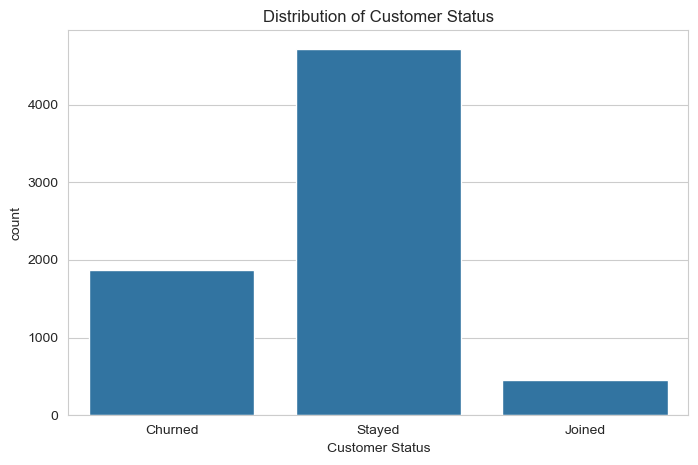

In [188]:
## Exploratory Data Analysis

# 1. Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', data=df_merged)
plt.title('Distribution of Customer Status')
plt.show()

In [189]:
# Churn rate
churn_rate = df_merged['Churn'].mean()
print(f"\nOverall Churn Rate: {churn_rate:.2%}")


Overall Churn Rate: 26.54%


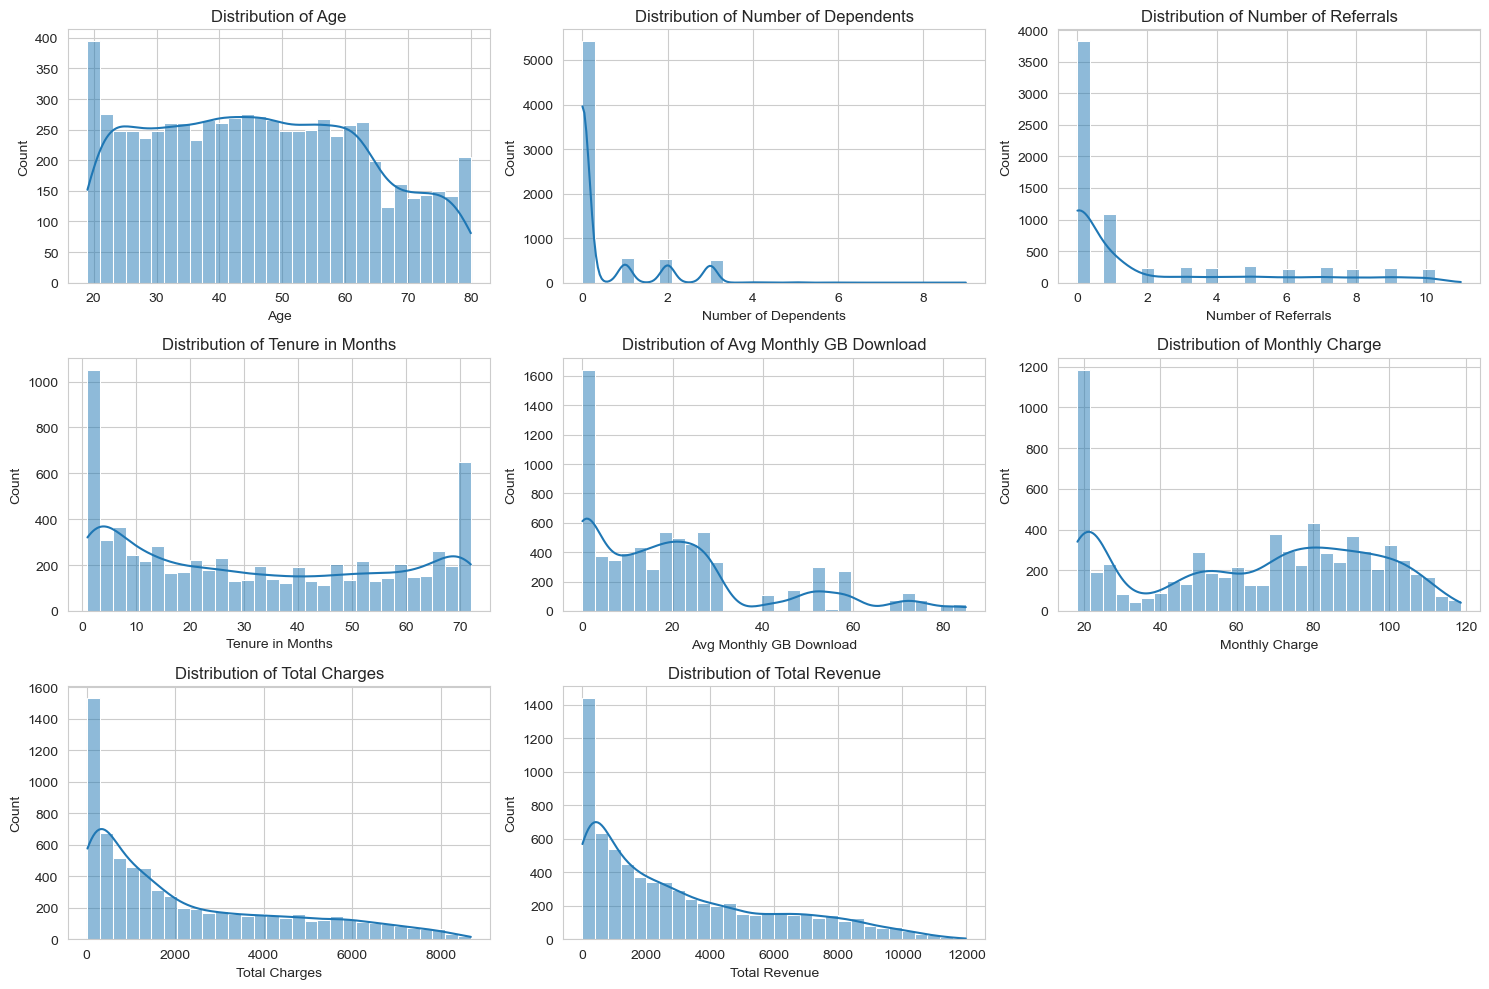

In [190]:
# 2. Numeric Features Analysis
numeric_features = ['Age', 'Number of Dependents', 'Number of Referrals', 
                   'Tenure in Months', 'Avg Monthly GB Download', 
                   'Monthly Charge', 'Total Charges', 'Total Revenue']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_merged[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

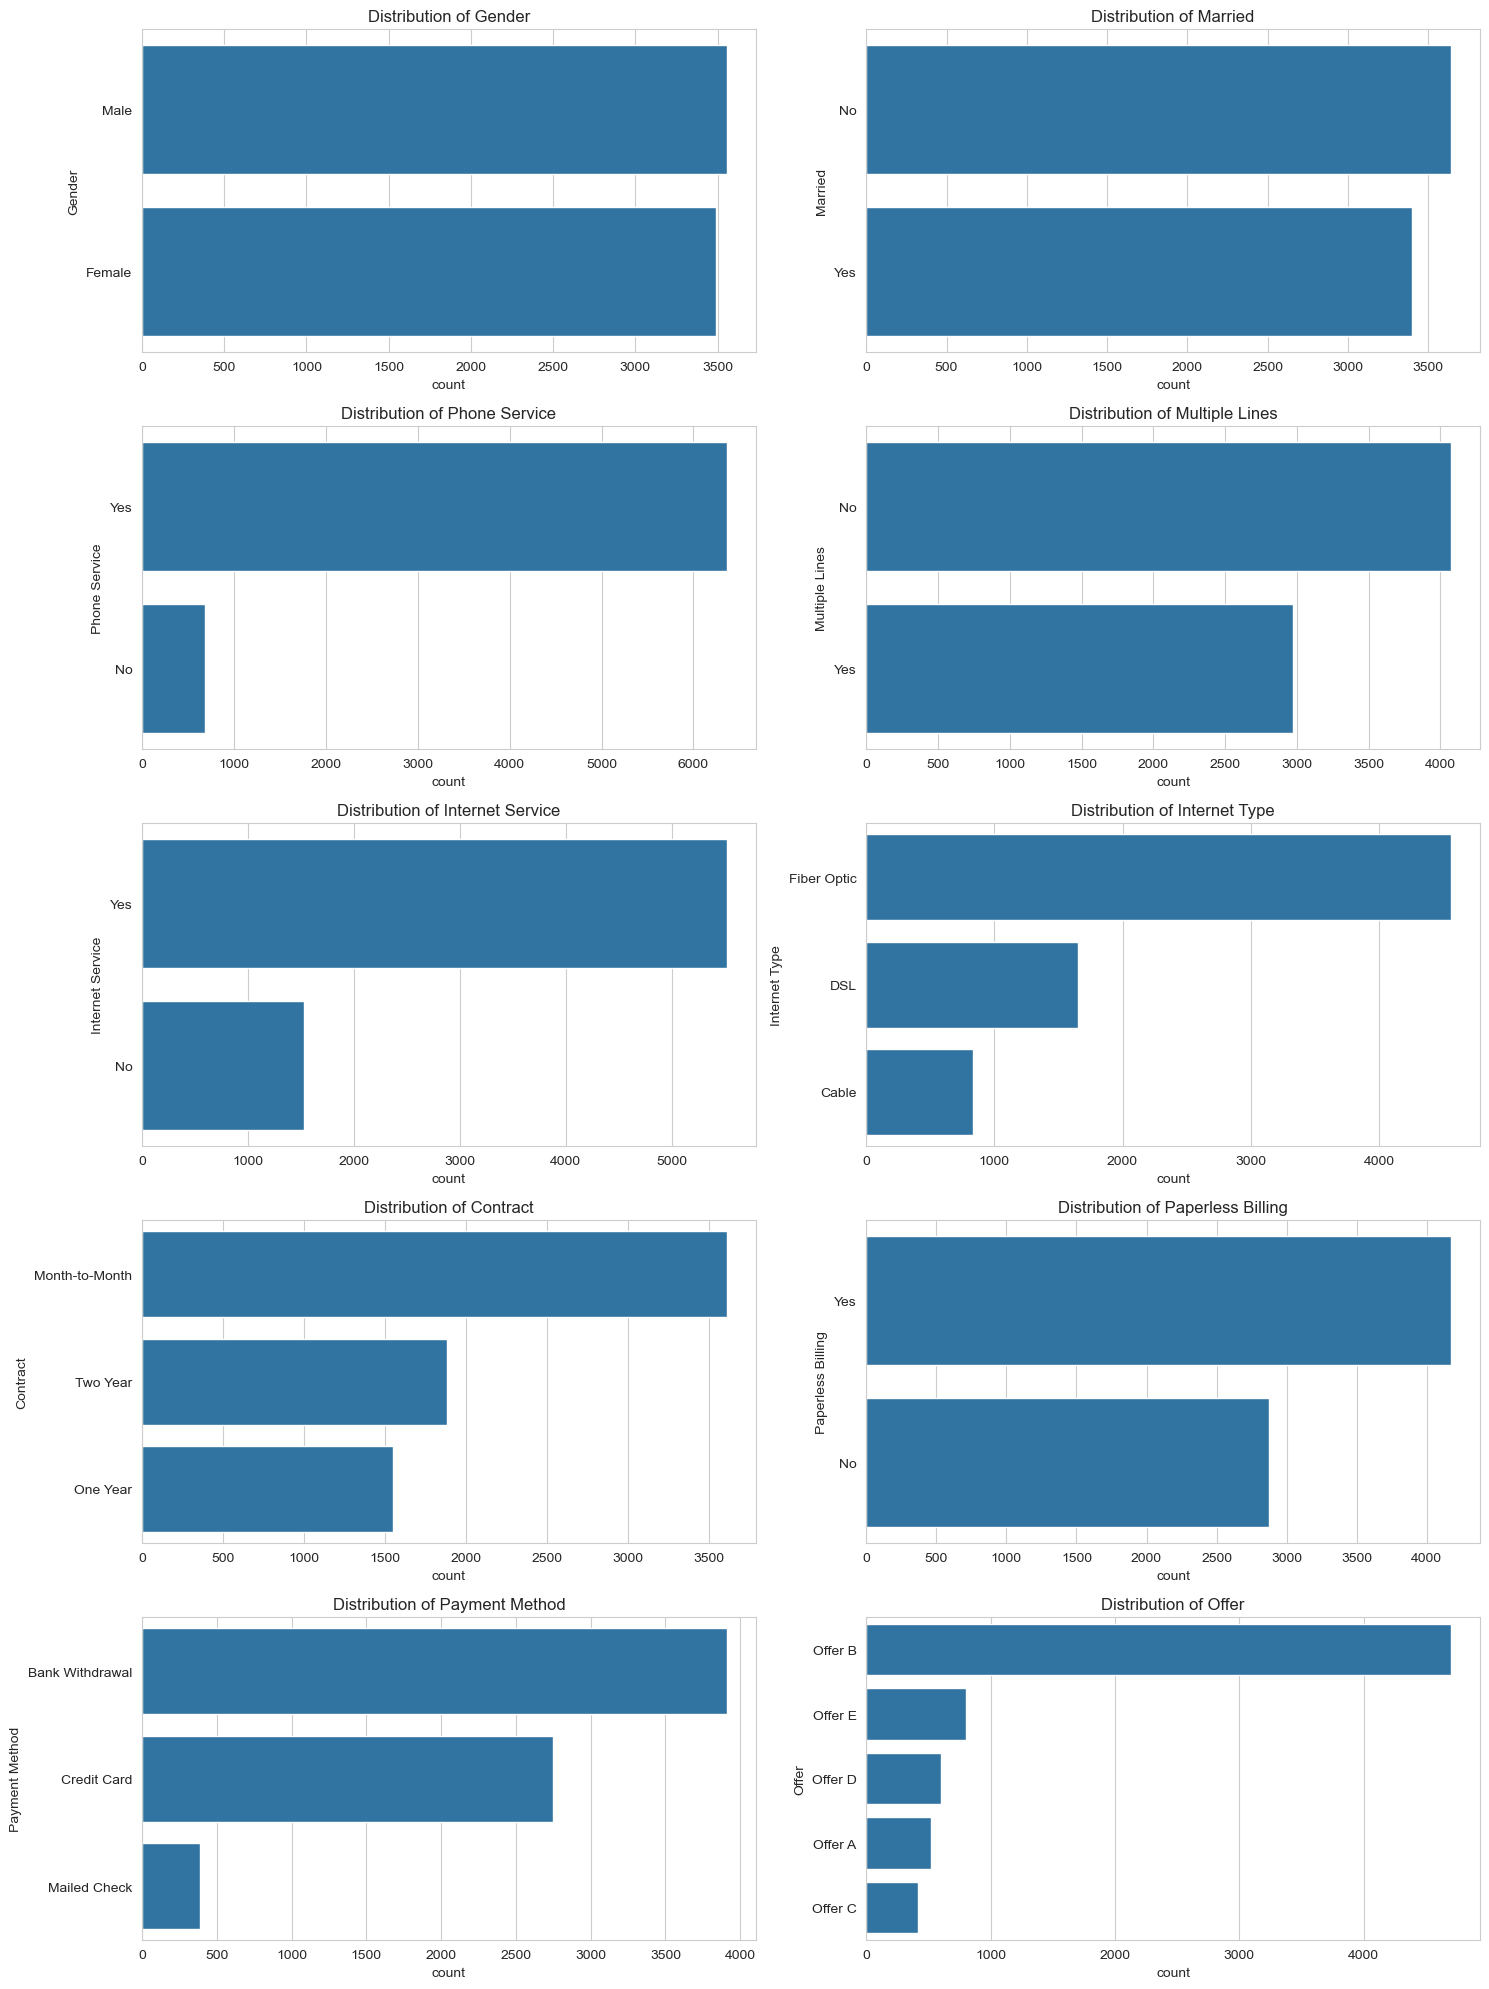

In [191]:
# 3. Categorical Features Analysis
categorical_features = ['Gender', 'Married', 'Phone Service', 'Multiple Lines',
                       'Internet Service', 'Internet Type', 'Contract',
                       'Paperless Billing', 'Payment Method', 'Offer']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=feature, data=df_merged, order=df_merged[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

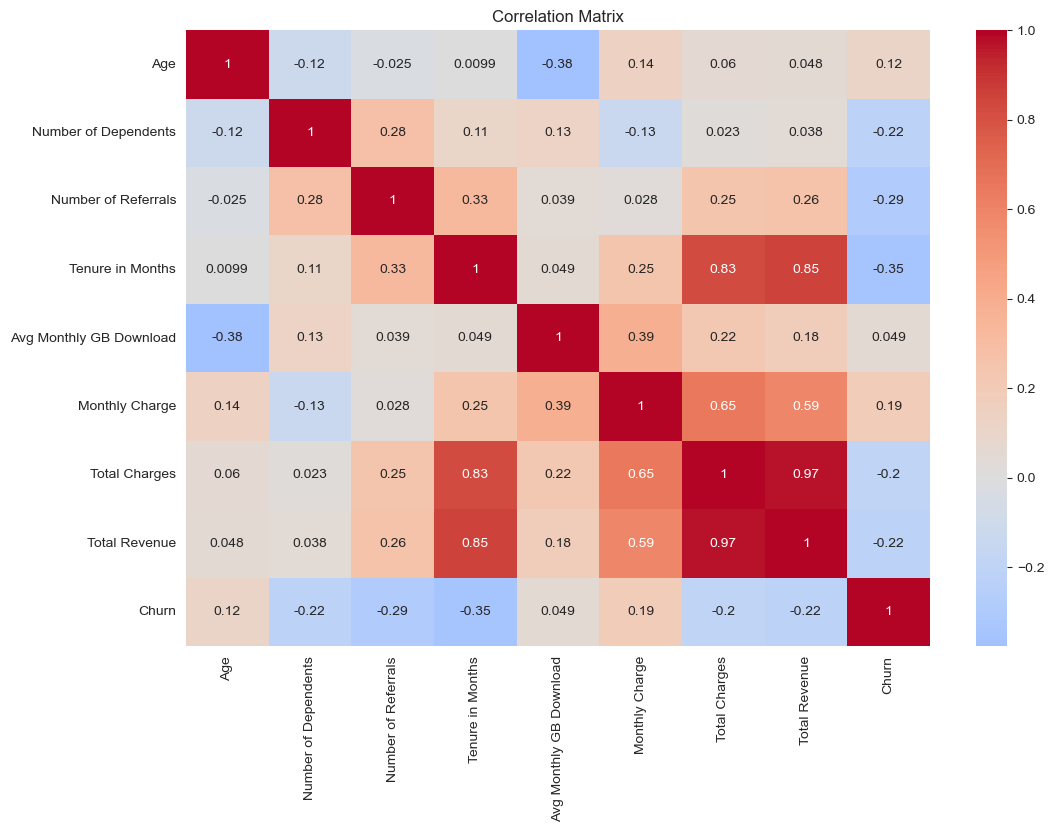

In [192]:
# 4. Correlation Analysis
plt.figure(figsize=(12, 8))
corr_matrix = df_merged[numeric_features + ['Churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

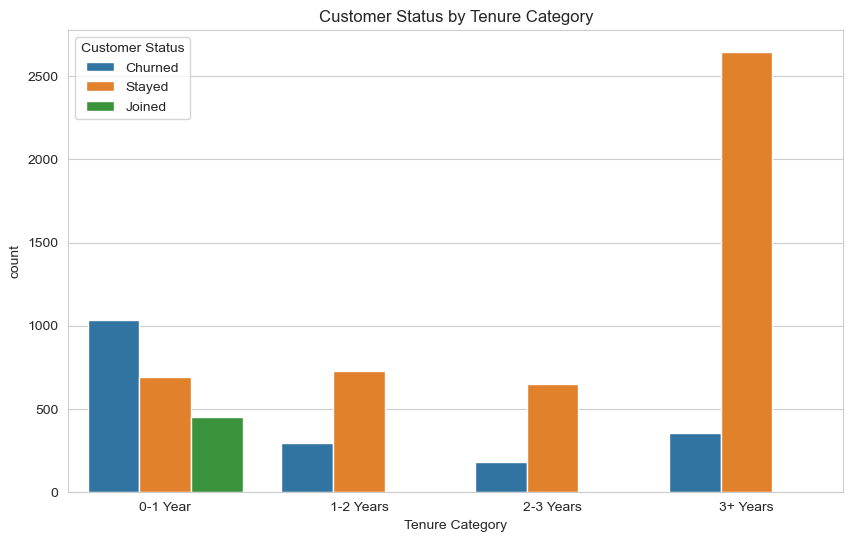

In [193]:
# 5. Churn by Various Features
# Churn by tenure
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure Category', hue='Customer Status', data=df_merged)
plt.title('Customer Status by Tenure Category')
plt.show()

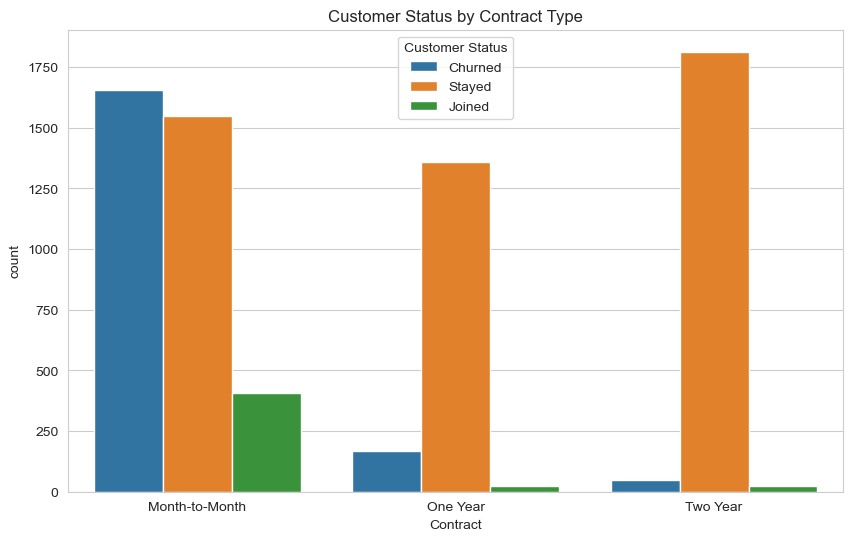

In [194]:
# Churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Customer Status', data=df_merged)
plt.title('Customer Status by Contract Type')
plt.show()

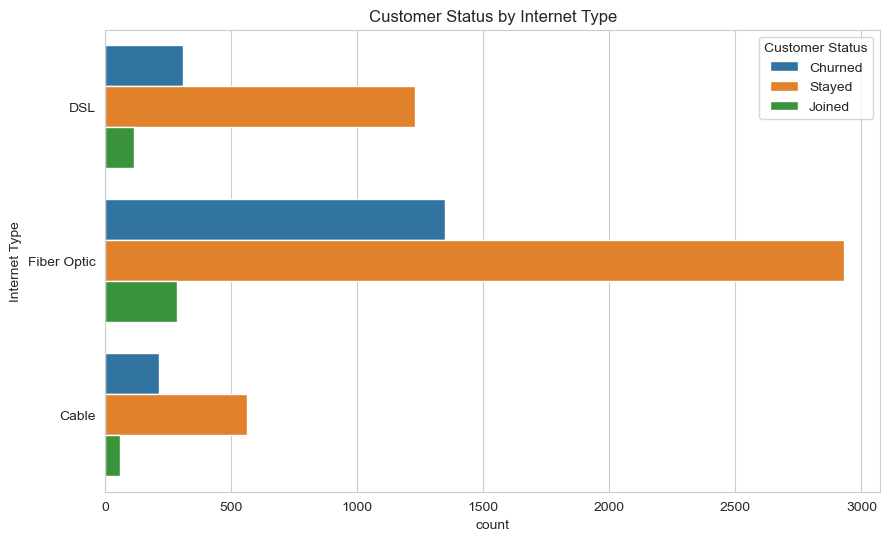

In [195]:
# Churn by internet type
plt.figure(figsize=(10, 6))
sns.countplot(y='Internet Type', hue='Customer Status', data=df_merged)
plt.title('Customer Status by Internet Type')
plt.show()

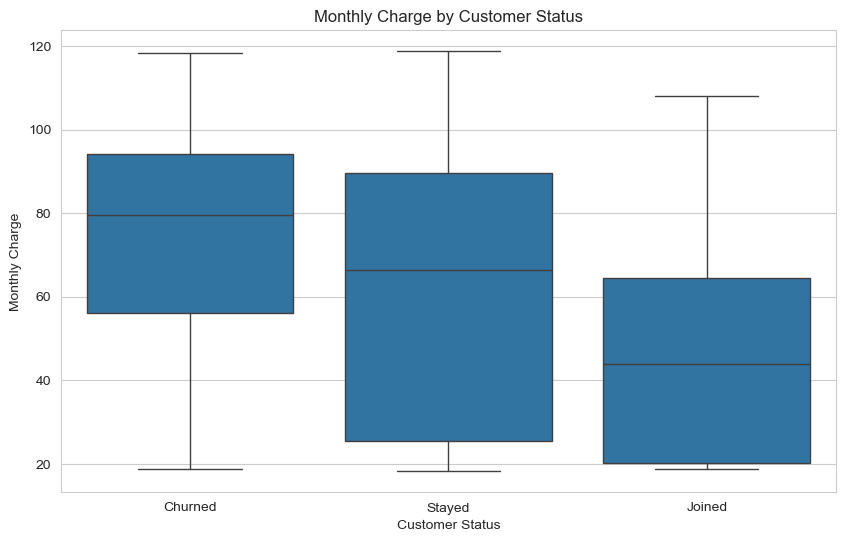

In [196]:
# 6. Monthly Charge vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df_merged)
plt.title('Monthly Charge by Customer Status')
plt.show()

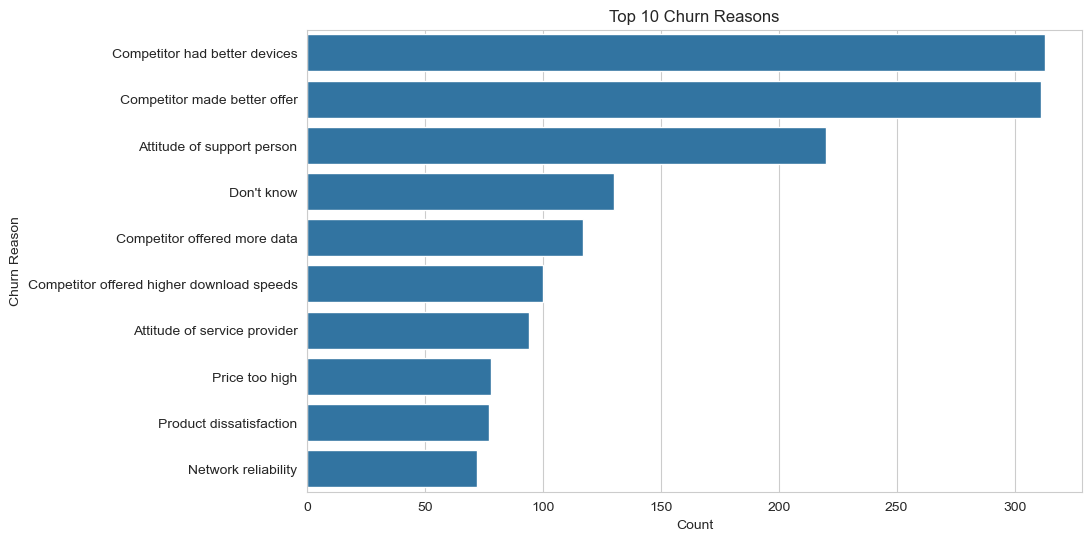

In [197]:
# 7. Top Churn Reasons
plt.figure(figsize=(10, 6))
churned = df_merged[df_merged['Customer Status'] == 'Churned']
top_reasons = churned['Churn Reason'].value_counts().head(10)
sns.barplot(x=top_reasons.values, y=top_reasons.index)
plt.title('Top 10 Churn Reasons')
plt.xlabel('Count')
plt.show()

In [198]:
# -------------------------------
# Feature Engineering
# -------------------------------

df_engineered = df_merged.copy()

# 1. ARPU (Average Revenue Per User) = Total Revenue / Tenure
df_engineered["ARPU"] = df_engineered["Total Revenue"] / df_engineered["Tenure in Months"].replace(0, 1)

# 2. Payment Consistency (proxy) = Total Revenue / (Monthly Charge * Tenure)
df_engineered["Payment Consistency"] = df_engineered["Total Revenue"] / (
    df_engineered["Monthly Charge"] * df_engineered["Tenure in Months"].replace(0, 1)
)

# 3. Service Bundling Score = Count of subscribed add-on services
addon_services = [
    "Online Security", "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music"
]
df_engineered["Service Bundling Score"] = df_engineered[addon_services].apply(
    lambda row: sum(row == "Yes"), axis=1
)

# 4. Complaint Frequency (proxy) = (Number of referrals as negative interaction)
# In a real dataset, you'd use actual complaints; here we approximate
df_engineered["Complaint Frequency"] = df_engineered["Number of Referrals"].fillna(0)

# 5. Engagement Index = Avg Monthly GB Download + Service Bundling Score
df_engineered["Engagement Index"] = df_engineered["Avg Monthly GB Download"].fillna(0) + df_engineered["Service Bundling Score"]

# 6. Senior Citizen Flag (binary from existing column)
df_engineered["Senior Flag"] = df_engineered["Senior Citizen"].apply(lambda x: 1 if x == "Yes" else 0)

# -------------------------------
# Save engineered dataset
# -------------------------------
df_engineered.to_csv("telco_integrated_dataset.csv", index=False)
print("\n Final engineered dataset saved as 'telco_integrated_dataset.csv'")

# Show sample of engineered features
df_engineered[["Customer ID", "ARPU", "Payment Consistency", "Service Bundling Score",
               "Complaint Frequency", "Engagement Index", "Senior Flag", "Churn Label"]].head()


 Final engineered dataset saved as 'telco_integrated_dataset.csv'


,Customer ID,ARPU,Payment Consistency,Service Bundling Score,Complaint Frequency,Engagement Index,Senior Flag,Churn Label
0,8779-QRDMV,59.650000,1.504414,2,0,10,1,Yes
1,7495-OOKFY,128.012500,1.587260,1,1,18,1,Yes
2,1658-BYGOY,106.160000,1.112205,3,0,55,1,Yes
3,4598-XLKNJ,119.802800,1.216272,4,1,16,1,Yes
4,4846-WHAFZ,83.847568,1.096047,0,1,14,1,Yes
